# import

In [446]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp

# Task 1
Key card location in Room 1.

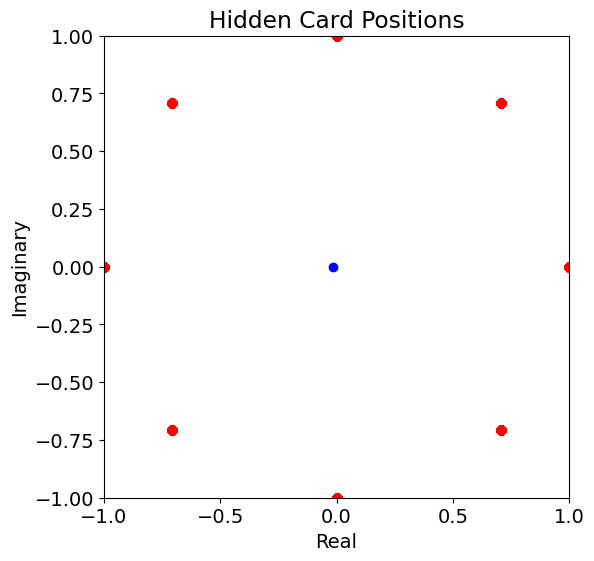

The key card is located at point: (-0.015384615384615368-9.735801908251373e-17j)


In [447]:
def hidden_card():
    # initialize variables
    a = 13  
    b = (1 + 1j) 
    
    # Initial position of the hidden card
    zinitial = (1 + 1j) / (math.sqrt(2) * (1j**4) * ((b / np.abs(b))**a))

    # steps needed 
    u = math.sqrt(2) / b

    # Move position by dividing the current position by u
    zposition = np.array([zinitial])

    # Create a plot of the hidden card's position
    plt.figure(figsize=(6, 6))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title('Hidden Card Positions')
    
    # Move 64 times until the card is found in the mean of all the 64 moves
    for i in range(64):
        zposition_new = zposition[i] / u
        zposition = np.append(zposition, zposition_new)
        plt.plot(zposition.real, zposition.imag, 'ro')
    
    # Calculate the mean of all 64 moves
    mean_of_zposition = np.mean(zposition)
    plt.plot(mean_of_zposition.real, mean_of_zposition.imag, 'bo')
    plt.show()
    
    return mean_of_zposition

mean_of_zposition = hidden_card()
print(f"The key card is located at point: {mean_of_zposition}")

# Task 2
steps needed to reach key card in room 2

In [448]:
def second_room():
    # Retrieve the mean position of the hidden card from the first room
    zmean = mean_of_zposition
    
    # Initialize variables
    a = 13
    count = 0
    b = (1 + 1j)
    
    # Calculate the initial position of the hidden card
    zinitial = (math.sqrt(2) * b) / (((b) / math.sqrt(2))**a)
    z_list = np.array([zinitial])
    
    # steps to move the card
    u = math.sqrt(2) / b

    # loops up to 64 times to find the hidden card
    while count < 64:
        # Update the position
        zposition = z_list[count] / u
        z_list = np.append(z_list, zposition)
        
        # Calculate the mean position
        zpositionmean2 = np.mean(z_list)

        # Check if the mean position is close to the initial mean position
        if np.isclose(zpositionmean2, zmean, atol=1e-1):
            print(f"The Key Card was found in {count} moves")
            break
        
        count += 1

        # If the card is not found after 64 moves, print a message
        if count == 63:
            print("Card not found")
            break
        elif count == 0:
            print("i have broken it")

# Execute the function
second_room()

The Key Card was found in 6 moves


# Task 3

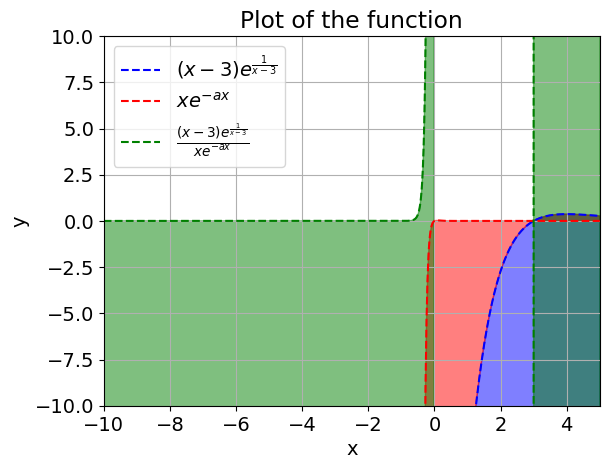

In [449]:
def task3():
    a = 13
    mpl.rcParams['font.size'] = 14
    # Define the range of x values
    x = np.linspace(-10, 5, 1000)


    # Calculate the function
    num = (x - 3) * (1 / np.exp(x - 3))
    den = x * np.exp(-a * x)
   
    # error handling for dividing by 0, and invalid values (which is what we are looking for)
    with np.errstate(divide='ignore', invalid='ignore'):
        y = np.where(den != 0, num / den, np.nan)
   
    # Plot the numerator, denominator, and the function of y
    plt.fill_between(x, num, np.min(num), color='blue', alpha=0.5)
    plt.plot(x, num, 'b--', label=r'$(x-3)e^{\frac{1}{x-3}}$')


    plt.fill_between(x, num, den, color='red', alpha=0.5)
    plt.plot(x, den, 'r--', label=r'$xe^{-ax}$')


    plt.fill_between(x, y, np.nanmin(y),color='green', alpha=0.5)
    plt.plot(x, y, 'g--', label=r'$\frac{(x-3)e^{\frac{1}{x-3}}}{xe^{-ax}}$')
   
   
    # Graph stuff
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Plot of the function')
    plt.xlim(-10, 5)
    plt.ylim(-10, 10)
    plt.grid()
    plt.show()
task3()

# Task 4

**Initialise implicit equation** $$ y^2 \cdot (x-2)^2 = x^3 - 2 \cdot a \cdot x^2 + a^2 \cdot x $$

In [450]:
def task4_implicit_equation():

    # implicit equation = Y**2 * (x-2*a)**2 = x**3 - 2*a*x**2+a**2*x
    # initialise variables
    a = 13
    x, y = sp.symbols('x y')

    left_hand_side = (y**2)*((x-2)**2)
    right_hand_side = (x**3) - 2 * a * x**2 + a**2 * x

    implicit_equation = sp.Eq(left_hand_side, right_hand_side)

    sp.pprint(implicit_equation)
    if sp.solve(implicit_equation, y):
        print("The equation is solvable")
    else:
        print("The equation is not solvable")

task4_implicit_equation()

 2        2    3       2        
y ⋅(x - 2)  = x  - 26⋅x  + 169⋅x
The equation is solvable


**Transform to explicit** $$ y = \pm \frac{\sqrt{x^3 - 2ax^2 + a^2x}}{(x-3)^2} $$

In [451]:
def task4_explicit_equation():
    # y = +-(sqrt((x**3) - 2*a*x**2 + a**2*x)) / (x-3)**2
    x, y = sp.symbols('x y')
    a = 13
    # value update
    left_hand_side = y
    right_hand_side = (sp.sqrt(x**3 - 2*a*x**2 + a**2*x)) / (x-3)**2

    eq = sp.Eq(left_hand_side, right_hand_side)
    sp.pprint(eq)

    if sp.solve(eq, y):
        print("The equation is solvable")
    else:
        print("The equation is not solvable")

task4_explicit_equation()


       ____________________
      ╱  3       2         
    ╲╱  x  - 26⋅x  + 169⋅x 
y = ───────────────────────
                  2        
           (x - 3)         
The equation is solvable


**Finding Root and Domain Of** $$ \pm \frac{\sqrt{x^3 - 26x^2 + 169x}}{(x-3)^2} $$

In [452]:
def task4_roots():
    # Define the right-hand side expression
    x, y = sp.symbols('x y')
    a = 13  # Ensure 'a' is defined
    equation = (sp.sqrt(x**3 - 2*a*x**2 + a**2*x)) / (x-3)**2

    # Expression under square root.
    equation = sp.Pow(equation , 2)

    # Equate to 0 and solve. Output the roots of the expression.
    roots = sp.solve(equation, x)
    print(roots)

task4_roots()


[0, 13]


Domain on a graph

Expressing the domain


C:\Users\riley\AppData\Local\Temp\ipykernel_13536\3933247441.py:5: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt((x**3 - 13*x*(2*x - 13))/(x -2*a)**2)


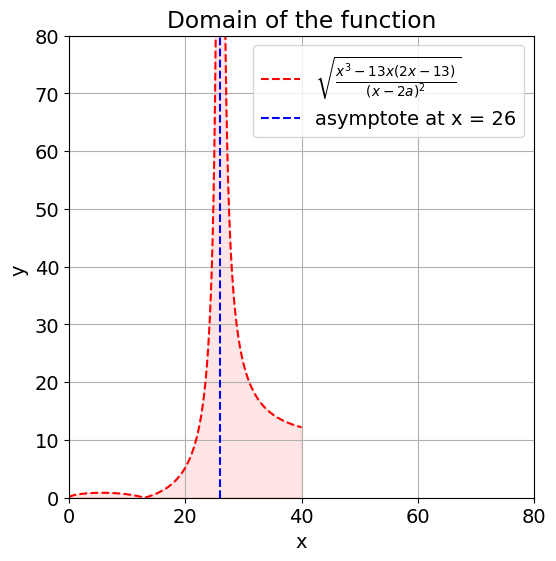

In [453]:
def task4_domain():
   # variables
    a = 13
    x = np.linspace(-10, 40, 1000)
    y = np.sqrt((x**3 - 13*x*(2*x - 13))/(x -2*a)**2)

    # calculating the asymptote
    asymptote = 2*a

    # initialising the plot
    fig = plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'r--', label=r'$\sqrt{\frac{x^3 - 13x(2x - 13)}{(x - 2a)^2}}$')
    plt.grid()

    # plot labels
    plt.xlabel('x'), plt.xlim(0, 80)
    plt.ylabel('y '), plt.ylim(0, 80)
    plt.fill_between(x, y, color='r', alpha=0.1)
    plt.title('Domain of the function')
    # plot lines
    plt.axvline(x=asymptote, color='b', linestyle='--', label='asymptote at x = 26')
    plt.legend()
    plt.show()

print("Expressing the domain")
task4_domain()

# task 5

{'comb': 13, 'perm': 13, 'Nan': nan, '0': 0}
s is {'comb': 13, 'perm': 13, 'Nan': nan, '0': 0}
p is True
p is True q is False r is True


'Choose the right lift'

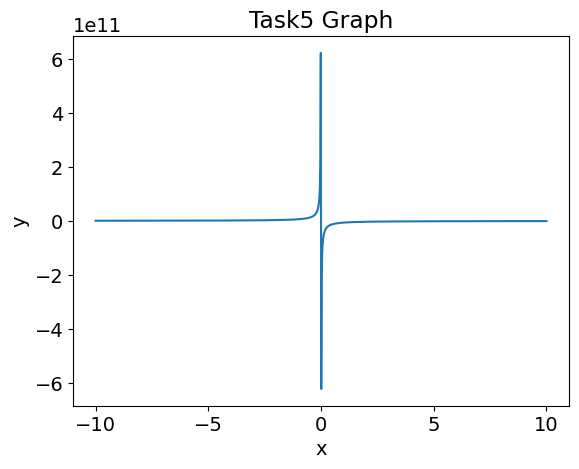

In [454]:
def evaluate_task5():
    # initialise variables
    a = 13
    s = {}
    s['comb'] = math.comb(a, 1)  # 13 choose 1
    s['perm'] = int((math.factorial(a)) / math.factorial(a - 1))  # 13 permute 1

    # plot the graph of the function
    x = np.linspace(-10, 10, 1000)
    y = -(math.factorial(a) / x)
    plt.plot(x, y)

    # add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Task5 Graph')

    s['Nan'] = sp.nan
    s['0'] = 0
    print(s)
    
    # define the implies function
    def implies(a, b):
        if a and not b:
            return False
        return True
    
    print(f"s is {s}")
    
    # check if the values are in the set
    p = {s['comb'], s['perm']}.intersection({a, 0}) == {a}
    print(f"p is {p}")
    q = {-math.inf}.issubset(s.values())
    r = {0}.issubset(s.values())

    # print the values of p, q, and r
    print("p is", p, "q is", q, "r is", r)

    # define the boolean algebra function
    def boolean_algebra(p, q, r):
        return (q ^ p) ^ r and implies(not q, not r)
    
    # check the left lift condition and return the result
    left_lift_condition = boolean_algebra(p, q, r)
    if left_lift_condition:
        return "Choose the left lift"
    else:
        return "Choose the right lift"
    
evaluate_task5()